In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/banknotes.csv')
df

Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [4]:
x=df.drop('Class',axis=1)     
y= df['Class']   # Output Label

In [5]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

In [7]:
x_train.shape

(1029, 4)

In [8]:
# Build The model
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(random_state=0,n_estimators=10)

In [9]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [10]:
y_pred=clf_rf.predict(x_test)

In [13]:
#Performance Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [12]:
accuracy_score(y_test,y_pred)

0.9941690962099126

In [14]:
print(confusion_matrix(y_test,y_pred))

[[193   2]
 [  0 148]]


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [16]:
clf_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [17]:
from sklearn.tree import plot_tree

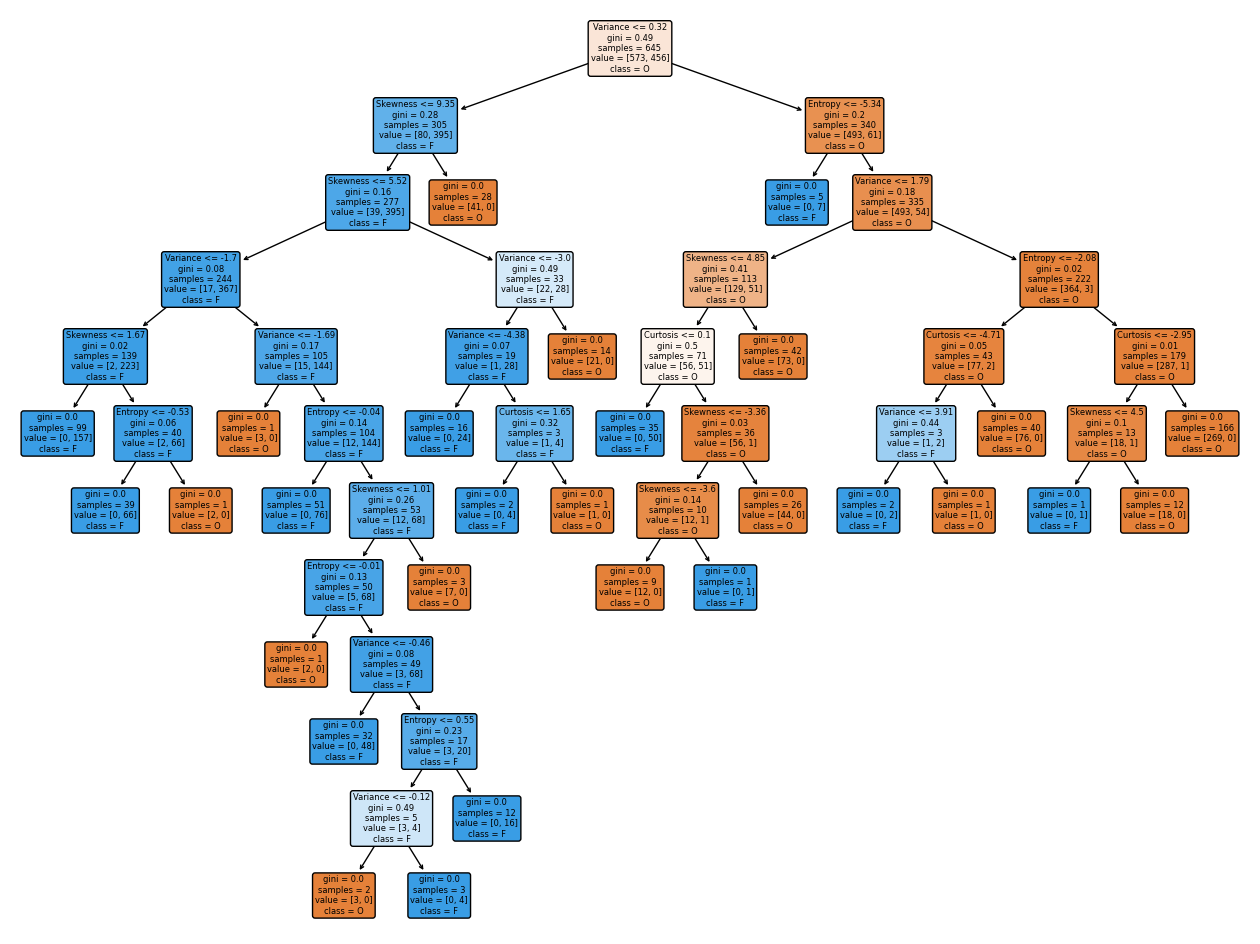

In [22]:
plt.figure(figsize=(16,12))
plot_tree(clf_rf.estimators_[3], fontsize=6, feature_names=x.columns,filled=True, precision=2, class_names=['O','F'], rounded=True);

In [23]:
%%time
clf_rf.fit(x_train,y_train)

CPU times: total: 15.6 ms
Wall time: 19 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf_tree= DecisionTreeClassifier(random_state=0)

In [25]:
%%time
clf_tree.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 3 ms


DecisionTreeClassifier(random_state=0)

In [26]:
import time

In [27]:
time.time()

1720681312.6435432

In [28]:
time.asctime()

'Thu Jul 11 12:34:38 2024'

In [36]:
start =time.time()
clf_tree.fit(x_train,y_train)
end= time.time()
print('Decision tree= ', end- start)

start =time.time()
clf_rf.fit(x_train,y_train)
end= time.time()
print('Random Forest= ', end- start)

Decision tree=  0.0029997825622558594
Random Forest=  0.020000934600830078
